In [48]:
## upload the file (work place satisfaction)
from google.colab import files
upload = files.upload()

Saving WorkPlaceSatisfactionSurveyData.xlsx to WorkPlaceSatisfactionSurveyData.xlsx


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import statsmodels.formula.api as smf
import os
from scipy import stats

In [92]:
## read the excel file
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [93]:
## showing number of records
print(f'DATASET CONTAINS:\n{df.shape[0]} ROWS\n{df.shape[1]} COLUMNS\n')


DATASET CONTAINS:
82 ROWS
16 COLUMNS



In [94]:
## checking duplicate values
duplicates = df.duplicated()
total_duplicate = df.duplicated().sum()

print(f'DATASET TOTAL DUPLICATE RECORDS:\n{total_duplicate}\n')

DATASET TOTAL DUPLICATE RECORDS:
0



In [95]:
## checking missing values
total_missing_value = df.isnull().sum().sum()  ## total missing values
missing_value_column = df.isnull().sum()  ## total missing values in each column

print(f'DATASET HAS TOTAL:\n{total_missing_value} missing values\n')
print(f'DATASET CONTAINS MISSING VALUE BY COLUMNS\n{missing_value_column}')

DATASET HAS TOTAL:
234 missing values

DATASET CONTAINS MISSING VALUE BY COLUMNS
number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64


In [96]:
## using data variable to make sure the handling process works correctly
columns = df.columns
for col in columns:
  ## if columns dtype is int or float. replace all missing values with 0
  if df[col].dtype in ['float64', 'int64']:
    df[col] = df[col].fillna(0)
##removing dublicate files when running the code multiple times
file_name = 'sat_workplace_cleaned.xlsx'
if os.path.exists(file_name):
  os.remove(file_name)
## exporting the processed file
df.to_excel(file_name, index=False)
## checking the processed file
print(f'Total missing values: {df.isnull().sum().sum()}')

Total missing values: 0


In [97]:
## checking validity of dtype
df.describe()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,41.500000,1.231707,37.951220,1.621951,1.963415,11.878049,2563.878049,3.060976,4.012195,3.219512,2.109756,3.195122,0.573171,0.243902,0.109756,0.268293
std,23.815261,0.424519,9.773866,0.487884,0.867024,8.900534,849.350302,1.058155,0.936158,1.154961,1.111179,1.047502,0.497661,0.432077,0.314509,0.445797
min,1.000000,1.000000,20.000000,1.000000,0.000000,0.000000,1521.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.000000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.000000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.000000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.000000,0.000000,0.000000,1.000000
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
## mapping gender values for further analysis
df['gender_label'] = df['gender'].map({1:'Male', 2:'Female'})
df['education_label'] = df['education'].map({0:'No Degree', 1:'Primary School', 2:'Secondary School', 3:'Bachelor Level', 4:'Master Level'})

# **1. Which gender is more likely to have salary satisfaction**

In [99]:
sorted_df = df.sort_values(by=['sat_salary'], ascending=False).head()
sorted_df[['gender_label','age','salary', 'years_of_service', 'sat_salary','education']]

,gender_label,age,salary,years_of_service,sat_salary,education
36,Female,56,2729,17.0,5,2.0
24,Male,43,2925,1.0,4,3.0
14,Male,53,3393,12.0,4,3.0
23,Male,36,4446,7.0,4,3.0
22,Male,44,3510,27.0,4,1.0


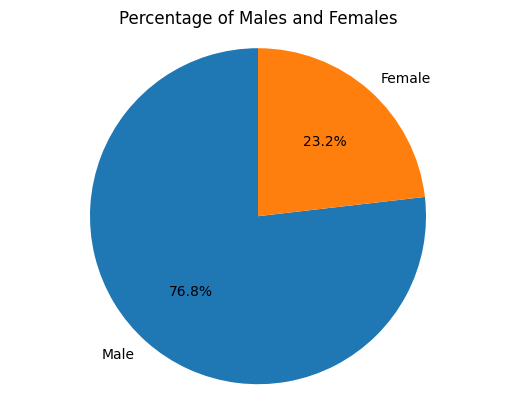

In [100]:
gender_counts = df['gender_label'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Males and Females')
plt.axis('equal')
plt.show()

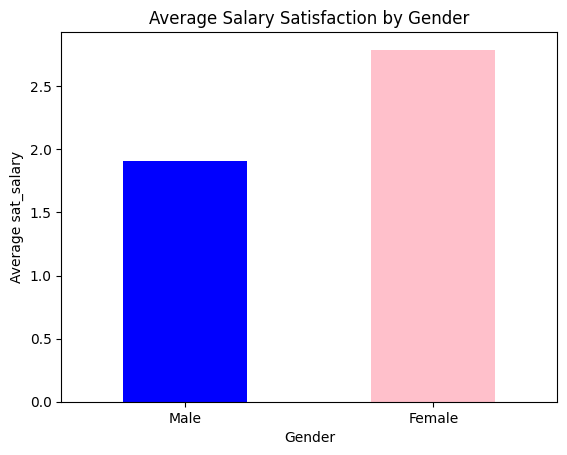

In [101]:
avg_sat_salary = df.groupby('gender_label')['sat_salary'].mean().reindex(['Male', 'Female'])
avg_sat_salary.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Salary Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average sat_salary')
plt.xticks(rotation=0)
plt.show()

In [102]:
gender_sat_table = df.groupby('gender_label')['sat_salary'].mean().reset_index()
print(gender_sat_table)

  gender_label  sat_salary
0       Female    2.789474
1         Male    1.904762


In [134]:
female_salaries = df[df['gender_label'] == 'Female']['sat_salary']
male_salaries = df[df['gender_label'] == 'Male']['sat_salary']
t_statistic, p_value = stats.ttest_ind(female_salaries, male_salaries)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 3.2122050719092337, P-value: 0.0018984804754973927


*There is a statistically significant difference in salary satisfaction between males and females, with females reporting higher average satisfaction (p<0.05)*


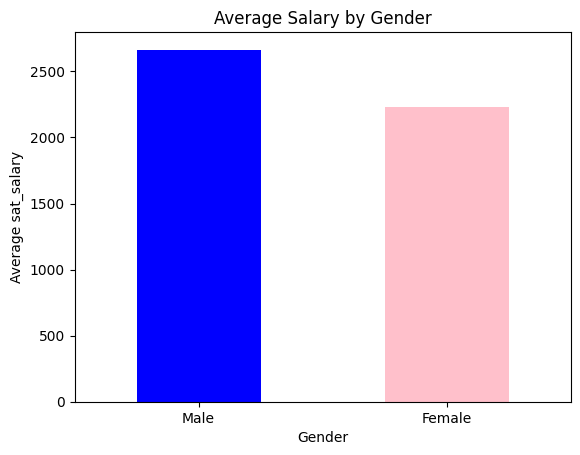

In [104]:
avg_salaries = df.groupby('gender_label')['salary'].mean().reindex(['Male', 'Female'])

avg_salaries.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average sat_salary')
plt.xticks(rotation=0)
plt.show()

# **2. How does employee satisfaction with management, colleagues, and the working environment correlate with overall job satisfaction?**

In [105]:
## calculating the correlation matrix of all satisfaction factors in the dataset
satisfaction_columns = ['sat_salary', 'sat_tasks', 'sat_management', 'sat_colleques', 'sat_workingEnvironment']
correlation_matrix = df[satisfaction_columns].corr()

print(correlation_matrix)

                        sat_salary  sat_tasks  sat_management  sat_colleques  \
sat_salary                1.000000   0.479884        0.540228       0.129247   
sat_tasks                 0.479884   1.000000        0.456933       0.173797   
sat_management            0.540228   0.456933        1.000000       0.248496   
sat_colleques             0.129247   0.173797        0.248496       1.000000   
sat_workingEnvironment    0.538940   0.576431        0.584918       0.305785   

                        sat_workingEnvironment  
sat_salary                            0.538940  
sat_tasks                             0.576431  
sat_management                        0.584918  
sat_colleques                         0.305785  
sat_workingEnvironment                1.000000  


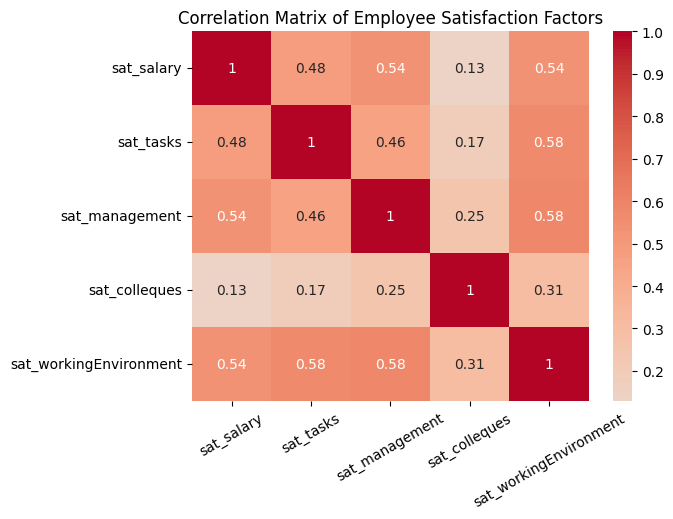

In [106]:
## visualizing the correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Employee Satisfaction Factors')
plt.xticks(rotation=30)
plt.show()

**Interpretation**: The holiday cabin benefit shows strong positive correlations with satisfaction in management (0.32), colleagues (0.24), and the working environment (0.44), indicating alignment with overall job satisfaction. In contrast, healthcare has negative correlations with these areas—management (-0.28), colleagues (-0.36), and the working environment (-0.44)—suggesting it may appeal to different employee priorities.


# **3. Does participation in company-provided benefits like healthcare, holiday cabins, gym, or muscle care correlate with employee satisfaction or retention?**

In [107]:
benefit_columns = ['healtcare', 'holidayCabin', 'gym','muscleCare']
correlation_matrix = df[benefit_columns + satisfaction_columns].corr()

print(correlation_matrix)

                        healtcare  holidayCabin       gym  muscleCare  \
healtcare                1.000000     -0.371092 -0.091381    0.355600   
holidayCabin            -0.371092      1.000000 -0.108576   -0.151637   
gym                     -0.091381     -0.108576  1.000000    0.051543   
muscleCare               0.355600     -0.151637  0.051543    1.000000   
sat_salary              -0.338419      0.329265  0.177062    0.014589   
sat_tasks               -0.382963      0.357264  0.046614   -0.087051   
sat_management          -0.278183      0.318103  0.128028   -0.061280   
sat_colleques           -0.359678      0.236727  0.079259   -0.126265   
sat_workingEnvironment  -0.436390      0.435652  0.068803   -0.067840   

                        sat_salary  sat_tasks  sat_management  sat_colleques  \
healtcare                -0.338419  -0.382963       -0.278183      -0.359678   
holidayCabin              0.329265   0.357264        0.318103       0.236727   
gym                       0.1

In [108]:
## focusing on correlations between benefits and satisfaction with benefit colummns as Row, satisfaction columns as Column
benefit_satisfaction_corr = correlation_matrix.loc[benefit_columns, satisfaction_columns]
print(benefit_satisfaction_corr)

              sat_salary  sat_tasks  sat_management  sat_colleques  \
healtcare      -0.338419  -0.382963       -0.278183      -0.359678   
holidayCabin    0.329265   0.357264        0.318103       0.236727   
gym             0.177062   0.046614        0.128028       0.079259   
muscleCare      0.014589  -0.087051       -0.061280      -0.126265   

              sat_workingEnvironment  
healtcare                  -0.436390  
holidayCabin                0.435652  
gym                         0.068803  
muscleCare                 -0.067840  


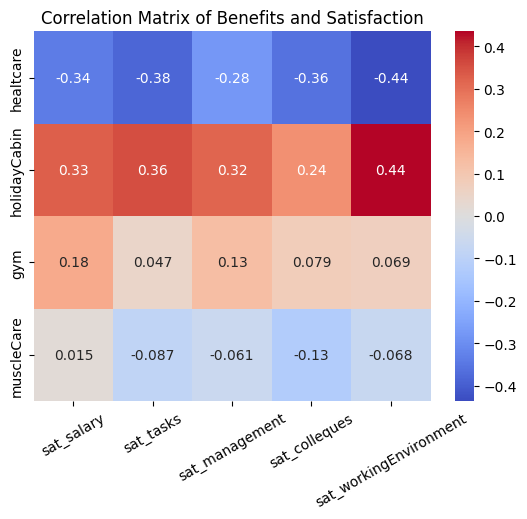

In [109]:
## visualizing using heatmap
sns.heatmap(benefit_satisfaction_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Benefits and Satisfaction')
plt.xticks(rotation=30)
plt.show()

Interpretation: Healthcare can be a significant source of stress for employees due to high costs, limited coverage, and complex systems. To mitigate these issues, companies can offer more comprehensive plans, provide resources for navigating healthcare, and advocate for policy changes.

On the other hand, holiday cabins can significantly improve employee well-being and job satisfaction. By providing opportunities for relaxation, recreation, and quality time with loved ones, these benefits can help reduce stress, increase productivity, and boost morale.

# **4. The higher the salary, the higher the satisfaction in salary??**

0.31488944257750906


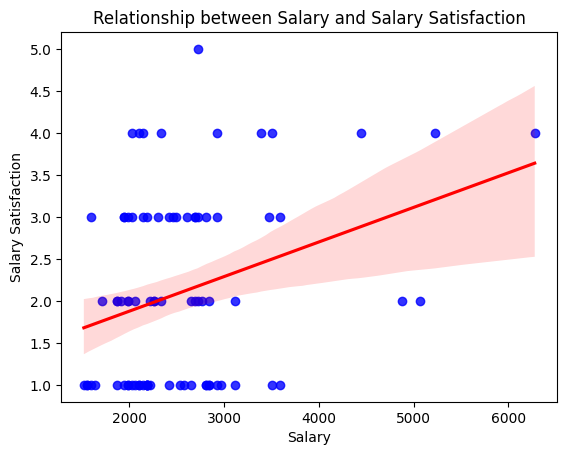

In [110]:
correlation = df['salary'].corr(df['sat_salary'])
print(correlation)
sns.regplot(x='salary', y='sat_salary', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship between Salary and Salary Satisfaction')
plt.xlabel('Salary')
plt.ylabel('Salary Satisfaction')
plt.show()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               82 non-null     float64
 5   years_of_service        82 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           82 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               82 non-null     float64
 13  holidayCabin            82 non-null     float64
 14  gym                     82 non-null     floa

**Interpretation**: From the scatter plot, you can see that as salaries go up, salary satisfaction also tends to go up because of the positive red line. However, the points are pretty spread out, which means that not everyone with a high salary feels super satisfied, and some people with lower salaries are still satisfied too.

So overall, while higher salaries seem to lead to higher satisfaction, it's not a perfect rule. People with similar salaries can feel differently about how satisfied they are with their pay.

# **5. What is the relationship between years of service and salary, and does it differ across genders?**

In [126]:
## calculating the correlation between years of service and salary
correlation = df['years_of_service'].corr(df['salary'])
print(correlation)

0.24884120540767304


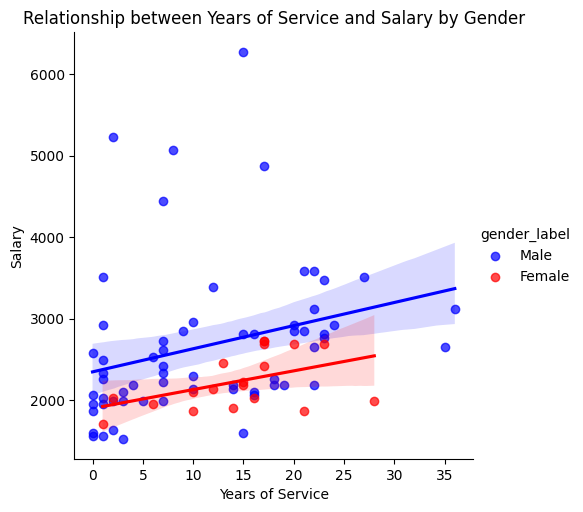

In [127]:
## visualizing the relationship using a scatter plot for
## labeling the gender from (1,2) to (male,female)
df['gender_label'] = df['gender'].map({1:'Male', 2:'Female'})
colors = {"Male":"blue", "Female":"red"}
sns.lmplot(x='years_of_service', y='salary', hue='gender_label', data=df, palette=colors, scatter_kws={'alpha' : 0.7})

plt.title('Relationship between Years of Service and Salary by Gender')
plt.xlabel('Years of Service')
plt.ylabel('Salary')
plt.show()

In [128]:
model = smf.ols('salary ~ years_of_service * gender', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.844
Date:                Sat, 26 Oct 2024   Prob (F-statistic):             0.0127
Time:                        16:06:53   Log-Likelihood:                -663.24
No. Observations:                  82   AIC:                             1334.
Df Residuals:                      78   BIC:                             1344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

*The model explains only 12.9% of the variance in `salary` (R-squared: 0.129), meaning most variation in salary remains unexplained. While the overall model is statistically significant (F-statistic p=0.0127), individual predictors like `years_of_service` (coef: 33.75, p=0.349), `gender` (coef: -447.47, p=0.350), and their interaction (`years_of_service:gender` coef: -5.37, p=0.860) lack statistical significance. This suggests that these variables don't reliably impact salary in this dataset.*

**Interpretation**: While differences exist in overall salary and satisfaction between genders, our analysis shows equal salary growth percentage during years of service. This indicates that men and women receive similar proportional increases in salary over time.

## 6.The higher education, the higher career satisfaction?

In [129]:
## assuming your satisfaction columns are: 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks'
df['sat_career'] = df[['sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks']].sum(axis=1)
correlation = df['education'].corr(df['sat_career'])
print(f"Correlation between education and career satisfaction: {correlation}")


Correlation between education and career satisfaction: 0.22692877176650725


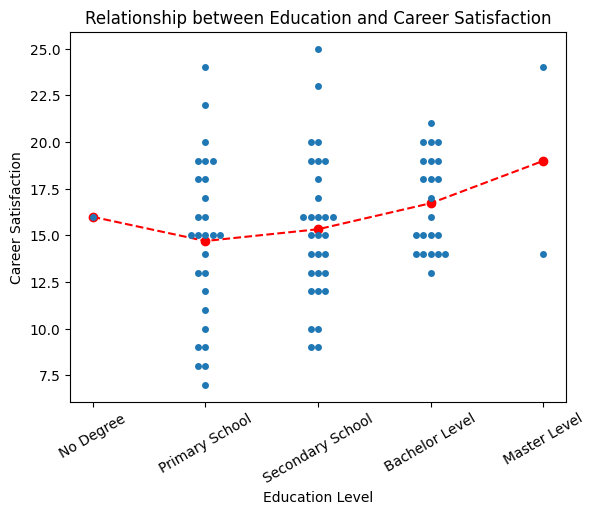

In [130]:
## define the order of education levels
education_order = ['No Degree', 'Primary School', 'Secondary School', 'Bachelor Level', 'Master Level']
df['education_label'] = pd.Categorical(df['education_label'], categories=education_order, ordered=True)
## creating the swarm plot
sns.swarmplot(x='education_label', y='sat_career', data=df, order=education_order)
## calculating average career satisfaction for each education level
avg_sat_career = df.groupby('education_label', observed=True)['sat_career'].mean()
## adding a line connecting the averages
plt.plot(avg_sat_career.index, avg_sat_career.values, color='red', marker='o', linestyle='--')
plt.title('Relationship between Education and Career Satisfaction')
plt.xlabel('Education Level')
plt.ylabel('Career Satisfaction')
plt.xticks(rotation=30)
plt.show()

In [131]:
## assuming your DataFrame is named 'df' and the education column is named 'education_label'
education_freq = df['education_label'].value_counts()
education_perc = df['education_label'].value_counts(normalize=True) * 100
## create a DataFrame to store the frequency and percentage
education_table = pd.DataFrame({'Frequency': education_freq, 'Percentage': education_perc})
## adding a row for the total sample size (n)
total_n = len(df)
education_table.loc['Total'] = [total_n, 100]

print(education_table)

                  Frequency  Percentage
education_label                        
Secondary School         30   36.585366
Primary School           27   32.926829
Bachelor Level           22   26.829268
Master Level              2    2.439024
No Degree                 1    1.219512
Total                    82  100.000000


Interpretation: The scatter plot illustrates a positive correlation between education level and career satisfaction. As education level increases, the average career satisfaction tends to increase. However, there is significant variability within each education level, suggesting that other factors besides education influence individual satisfaction.